# 07_05: Simulating data

In [5]:
import math
import collections
import dataclasses
import datetime
import random
import faker

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
fake = faker.Faker()

In [7]:
fake.name()

'Greg Miller'

In [8]:
fake.address()

'03779 Rocha Throughway Apt. 747\nNorth Caroline, AL 19706'

In [9]:
fake.date_of_birth()

datetime.date(1988, 11, 5)

In [10]:
fake.city()

'Tarafurt'

In [11]:
fake.state_abbr()

'MP'

In [12]:
music_genres = ['Rock', 'Pop', 'Jazz', 'Hip Hop', 'Country', 'Electronic', 'Blues', 
                'Reggae', 'Metal', 'Folk', 'Soul', 'R&B', 'Punk', 'Indie', 'Alternative']

In [13]:
def artist():
    return {'name': fake.name(),
            'dob': pd.to_datetime(fake.date_of_birth(minimum_age=16, maximum_age=80)), # from Python to pandas date object
            'birthplace': f'{fake.city()} {fake.state_abbr()}',
            'genre': fake.random_element(music_genres)}

In [14]:
artist()

{'name': 'Jerry Miller',
 'dob': Timestamp('1958-10-26 00:00:00'),
 'birthplace': 'East Donald OK',
 'genre': 'Pop'}

In [16]:
artists = pd.DataFrame([artist() for i in range(100)])
artists.index.name = 'artist_id'

artists

,name,dob,birthplace,genre
artist_id,,,,
0,Tyler Price,1953-04-05,West Bryanmouth GA,Rock
1,Brian Hunt,1947-07-16,Jenniferstad AZ,Folk
2,Danielle Frank,1958-06-02,North Charles HI,Rock
3,Sergio Smith,2008-03-27,North Patrick MH,R&B
4,Kenneth Brown,1958-12-14,Lake Wesley AK,Blues
...,...,...,...,...
95,Jeanette Moore,1977-10-24,Antoniotown MP,R&B
96,Carlos Frey,1992-12-17,South Gloria MI,Hip Hop
97,Kerry Rivera,1948-08-29,Williamshaven AR,Electronic


In [17]:
def song():
    artist = fake.random_element(artists.index)
    
    return {'title': fake.text(max_nb_chars=20)[:-1], # skip the final period
            'release': pd.to_datetime(fake.past_date(start_date="-2y")), # get dates in the last two years
            'artist_id': artist,
            'genre': artists.loc[artist, 'genre']}

print(song())
print(song())

{'title': 'Catch likely', 'release': Timestamp('2023-09-26 00:00:00'), 'artist_id': 24, 'genre': 'Soul'}
{'title': 'Provide important', 'release': Timestamp('2024-05-26 00:00:00'), 'artist_id': 23, 'genre': 'R&B'}


In [18]:
songs = pd.DataFrame([song() for i in range(500)])
songs.index.name = 'song_id'

songs

,title,release,artist_id,genre
song_id,,,,
0,Sit music strategy,2025-08-15,26,Soul
1,There myself public,2025-01-16,87,Alternative
2,Energy tough public,2024-03-10,64,Pop
3,Better across six,2025-06-03,68,Indie
4,Value happen if,2024-07-02,5,Blues
...,...,...,...,...
495,Walk standard wind,2025-03-23,50,R&B
496,Age treatment score,2025-05-02,64,Pop
497,Million agent poor,2025-05-19,60,Blues


In [19]:
songs.loc[0].release

Timestamp('2025-08-15 00:00:00')

In [20]:
duration = np.random.randint(10, 50)

In [21]:
songs.loc[0].release + pd.Timedelta(weeks=duration)

Timestamp('2026-06-26 00:00:00')

In [22]:
t = pd.date_range(start=songs.loc[0].release,
                  end=songs.loc[0].release + pd.Timedelta(weeks=duration),
                  freq='W-MON')[:duration] # handle case where release is on Monday
t

DatetimeIndex(['2025-08-18', '2025-08-25', '2025-09-01', '2025-09-08',
               '2025-09-15', '2025-09-22', '2025-09-29', '2025-10-06',
               '2025-10-13', '2025-10-20', '2025-10-27', '2025-11-03',
               '2025-11-10', '2025-11-17', '2025-11-24', '2025-12-01',
               '2025-12-08', '2025-12-15', '2025-12-22', '2025-12-29',
               '2026-01-05', '2026-01-12', '2026-01-19', '2026-01-26',
               '2026-02-02', '2026-02-09', '2026-02-16', '2026-02-23',
               '2026-03-02', '2026-03-09', '2026-03-16', '2026-03-23',
               '2026-03-30', '2026-04-06', '2026-04-13', '2026-04-20',
               '2026-04-27', '2026-05-04', '2026-05-11', '2026-05-18',
               '2026-05-25', '2026-06-01', '2026-06-08', '2026-06-15',
               '2026-06-22'],
              dtype='datetime64[ns]', freq='W-MON')

In [23]:
initial_plays = np.random.randint(500000, 1000000)

In [24]:
cleanplays = initial_plays * np.linspace(1, 1/duration, duration)

In [25]:
noisyplays = cleanplays * np.random.uniform(0.8, 1.2, duration)

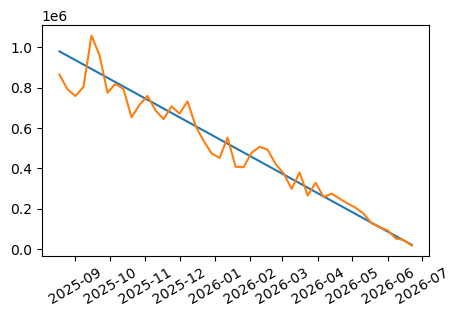

In [26]:
plt.figure(figsize=(5,3))
plt.plot(t, cleanplays)
plt.plot(t, noisyplays)
plt.xticks(rotation=30); # angled tick labels are more readable

In [27]:
def history(song_id):
    duration = np.random.randint(10, 50)

    t = pd.date_range(start=songs.loc[song_id].release,
                      end=songs.loc[song_id].release + pd.Timedelta(weeks=duration),
                      freq='W-MON')[:duration]

    initial_plays = np.random.randint(500000, 1000000)
    plays = initial_plays * np.linspace(1, 0, duration) * np.random.uniform(0.8, 1.2, duration)
    
    return pd.DataFrame({'song_id': song_id, 'plays': plays.astype(int), 'date': t})

In [28]:
history(1).head()

,song_id,plays,date
0,1,802711,2025-01-20
1,1,582049,2025-01-27
2,1,554498,2025-02-03
3,1,441994,2025-02-10
4,1,510021,2025-02-17


In [29]:
histories = pd.concat([history(song_id) for song_id in songs.index], axis=0) \
              .reset_index().rename(columns={'index': 'week'})

histories

,week,song_id,plays,date
0,0,0,607072,2025-08-18
1,1,0,618674,2025-08-25
2,2,0,654434,2025-09-01
3,3,0,545329,2025-09-08
4,4,0,593040,2025-09-15
...,...,...,...,...
14411,13,499,174448,2024-12-23
14412,14,499,171681,2024-12-30
14413,15,499,107078,2025-01-06
14414,16,499,58535,2025-01-13


In [30]:
histories = histories[(histories.date > pd.Timestamp.today() - pd.Timedelta(weeks=52)) &
                      (histories.date <= pd.Timestamp.today())]

In [31]:
histories = histories.sort_values(['date', 'plays'], ascending=[True, False])

In [32]:
topten = histories.groupby('date').head(10).set_index('date')
topten

,week,song_id,plays
date,,,
2024-08-26,1,458,976353
2024-08-26,0,356,908684
2024-08-26,5,324,889919
2024-08-26,1,335,882826
2024-08-26,1,226,860683
...,...,...,...
2025-08-18,7,318,764094
2025-08-18,12,278,745892
2025-08-18,5,310,742310


In [33]:
topten.loc['2024-09-09']

,week,song_id,plays
date,,,
2024-09-09,3,309,997070
2024-09-09,3,226,942994
2024-09-09,11,385,834936
2024-09-09,1,246,826552
2024-09-09,2,356,808029
2024-09-09,7,324,806288
2024-09-09,1,487,771600
2024-09-09,1,109,767539
2024-09-09,3,335,739017


In [34]:
topten['rank'] = topten.groupby('date').plays.rank(ascending=False)

topten

,week,song_id,plays,rank
date,,,,
2024-08-26,1,458,976353,1.0
2024-08-26,0,356,908684,2.0
2024-08-26,5,324,889919,3.0
2024-08-26,1,335,882826,4.0
2024-08-26,1,226,860683,5.0
...,...,...,...,...
2025-08-18,7,318,764094,6.0
2025-08-18,12,278,745892,7.0
2025-08-18,5,310,742310,8.0


In [35]:
songs.head()

,title,release,artist_id,genre
song_id,,,,
0,Sit music strategy,2025-08-15,26,Soul
1,There myself public,2025-01-16,87,Alternative
2,Energy tough public,2024-03-10,64,Pop
3,Better across six,2025-06-03,68,Indie
4,Value happen if,2024-07-02,5,Blues


In [36]:
artists.head()

,name,dob,birthplace,genre
artist_id,,,,
0,Tyler Price,1953-04-05,West Bryanmouth GA,Rock
1,Brian Hunt,1947-07-16,Jenniferstad AZ,Folk
2,Danielle Frank,1958-06-02,North Charles HI,Rock
3,Sergio Smith,2008-03-27,North Patrick MH,R&B
4,Kenneth Brown,1958-12-14,Lake Wesley AK,Blues


In [37]:
merged = topten.merge(songs, left_on='song_id', right_index=True) \
               .merge(artists.name, left_on='artist_id', right_index=True)
merged

,week,song_id,plays,rank,title,release,artist_id,genre,name
date,,,,,,,,,
2024-08-26,1,458,976353,1.0,Mind year hour far,2024-08-16,22,Country,Johnny Larsen
2024-08-26,0,356,908684,2.0,Girl drug include,2024-08-22,87,Alternative,Daniel Williams
2024-08-26,5,324,889919,3.0,Coach follow may,2024-07-18,77,Alternative,Richard Maldonado
2024-08-26,1,335,882826,4.0,Mission offer,2024-08-13,53,Reggae,Bryan Jacobs
2024-08-26,1,226,860683,5.0,Guess real throw,2024-08-16,97,Electronic,Kerry Rivera
...,...,...,...,...,...,...,...,...,...
2025-08-18,7,318,764094,6.0,Beyond memory lose,2025-06-30,9,Soul,Erin Boyd
2025-08-18,12,278,745892,7.0,Even various not,2025-05-21,67,R&B,Cynthia Farrell
2025-08-18,5,310,742310,8.0,Community act,2025-07-10,78,Punk,Elizabeth Mitchell


In [38]:
first = merged.query('rank == 1').groupby('name').title.count().sort_values(ascending=False).head()
first

name
Kerry Rivera            8
Amy Gray                3
Dr. David Stevens MD    3
Andre Holt              3
Kristine Johnson        3
Name: title, dtype: int64

In [39]:
merged[(merged['rank'] == 1) & (merged['name'] == first.index[0])]

,week,song_id,plays,rank,title,release,artist_id,genre,name
date,,,,,,,,,
2024-09-02,2,226,956394,1.0,Guess real throw,2024-08-16,97,Electronic,Kerry Rivera
2024-09-23,5,226,970468,1.0,Guess real throw,2024-08-16,97,Electronic,Kerry Rivera
2024-11-04,0,57,1052043,1.0,Agree decision role,2024-11-03,97,Electronic,Kerry Rivera
2024-11-11,1,57,1013754,1.0,Agree decision role,2024-11-03,97,Electronic,Kerry Rivera
2024-11-18,2,52,1066235,1.0,Without product,2024-11-02,97,Electronic,Kerry Rivera
2024-12-09,5,52,1017968,1.0,Without product,2024-11-02,97,Electronic,Kerry Rivera
2025-03-10,0,264,998562,1.0,Remain what article,2025-03-04,97,Electronic,Kerry Rivera
2025-04-14,5,264,867822,1.0,Remain what article,2025-03-04,97,Electronic,Kerry Rivera


In [40]:
merged.to_hdf('songtables.h5', key='topten')
artists.to_hdf('songtables.h5', key='artists')
songs.to_hdf('songtables.h5', key='songs')

In [41]:
h5 = pd.HDFStore('songtables.h5')

In [42]:
h5.keys()

['/artists', '/songs', '/topten']

In [43]:
h5['/artists']

,name,dob,birthplace,genre
artist_id,,,,
0,Tyler Price,1953-04-05,West Bryanmouth GA,Rock
1,Brian Hunt,1947-07-16,Jenniferstad AZ,Folk
2,Danielle Frank,1958-06-02,North Charles HI,Rock
3,Sergio Smith,2008-03-27,North Patrick MH,R&B
4,Kenneth Brown,1958-12-14,Lake Wesley AK,Blues
...,...,...,...,...
95,Jeanette Moore,1977-10-24,Antoniotown MP,R&B
96,Carlos Frey,1992-12-17,South Gloria MI,Hip Hop
97,Kerry Rivera,1948-08-29,Williamshaven AR,Electronic
